In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string


import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D , BatchNormalization
from tensorflow.keras import utils
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
#import train and test csv
train_df = pd.read_csv('./data/sign_mnist_train.csv')
test_df = pd.read_csv('./data/sign_mnist_test.csv')

In [3]:
train_df['label'].value_counts()

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
14    1196
3     1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

Data seems pretty balanced. We will keep an eye on 4.

In [4]:
#Dictionary for labels
label_dic = {i:string.ascii_uppercase[i] for i in range(26)}

In [5]:
#delete J and Z
label_dic.pop(9)
label_dic.pop(25)

'Z'

In [15]:
label_dic

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y'}

In [6]:
y_train = train_df['label']
y_test = test_df['label']
y_test_labels = test_df['label']

In [7]:
X_train = train_df.drop(columns = 'label').values
X_test = test_df.drop(columns = 'label').values

In [9]:
type(X_train) , X_train.shape

(numpy.ndarray, (27455, 784))

In [86]:
X_train = X_train.reshape(X_train.shape[0],28,28)
X_test = X_test.reshape(X_test.shape[0],28,28)

In [10]:
X_train.shape

(27455, 784)

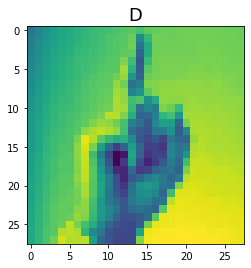

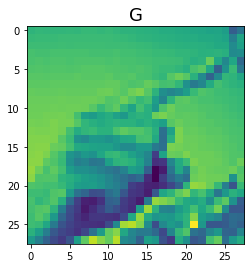

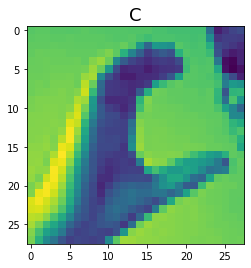

In [81]:
#Visualize a few images
for i in range(3):
    plt.imshow(X_train[i])
    plt.title(label_dic[y_train[i]],fontsize = 18)
    plt.show()

In [87]:
X_train.shape, X_test.shape, y_train.shape , y_test.shape

((27455, 28, 28), (7172, 28, 28), (27455,), (7172,))

In [88]:
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

In [89]:
X_train.shape, X_test.shape

((27455, 28, 28, 1), (7172, 28, 28, 1))

In [90]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [11]:
X_train.shape

(27455, 784)

In [12]:
X_test.shape

(7172, 784)

In [14]:
X_train[0].shape

(784,)

In [91]:
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

## CNN Model

In [100]:
#Instantiate model
cnn = Sequential()

#Conv layer1
cnn.add(Conv2D(filters = 6,
              kernel_size = (3,3),
              activation = 'relu',
              input_shape = (28,28,1)
              ))

#MaxPool layer1
cnn.add(MaxPooling2D(pool_size = (2,2)))

#Conv layer2
cnn.add(Conv2D(filters = 16,
              kernel_size = (3,3),
              activation = 'relu'
              ))

#MaxPool2
cnn.add(MaxPooling2D(pool_size = (2,2)))

#Flatten
cnn.add(Flatten())

#Dense Layers
cnn.add(Dense(128,activation = 'relu'))
cnn.add(Dense(32,activation = 'relu'))
cnn.add(Dense(25, activation = 'softmax'))

In [101]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               51328     
_________________________________________________________________
dense_7 (Dense)              (None, 32)               

In [102]:
#Compile
cnn.compile(loss = 'categorical_crossentropy',
           optimizer = 'adam',
           metrics = ['accuracy'])

In [103]:
X_train.shape, y_train.shape , X_test.shape , y_test.shape

((27455, 28, 28, 1), (27455, 25), (7172, 28, 28, 1), (7172, 25))

In [104]:
#
history = cnn.fit(X_train,y_train , validation_data = (X_test,y_test),
                  batch_size = 256,
                  epochs = 10,
                  verbose =1)

Epoch 1/10
108/108 [==============================] - 5s 39ms/step - loss: 3.0460 - accuracy: 0.1242 - val_loss: 1.8463 - val_accuracy: 0.4293
Epoch 2/10
108/108 [==============================] - 4s 40ms/step - loss: 1.4425 - accuracy: 0.5643 - val_loss: 1.0926 - val_accuracy: 0.6634
Epoch 3/10
108/108 [==============================] - 5s 46ms/step - loss: 0.8268 - accuracy: 0.7441 - val_loss: 0.8409 - val_accuracy: 0.7267
Epoch 4/10
108/108 [==============================] - 5s 45ms/step - loss: 0.5370 - accuracy: 0.8422 - val_loss: 0.6599 - val_accuracy: 0.7868
Epoch 5/10
108/108 [==============================] - 5s 43ms/step - loss: 0.3560 - accuracy: 0.9006 - val_loss: 0.5535 - val_accuracy: 0.8272
Epoch 6/10
108/108 [==============================] - 4s 40ms/step - loss: 0.2379 - accuracy: 0.9361 - val_loss: 0.5183 - val_accuracy: 0.8300
Epoch 7/10
108/108 [==============================] - 4s 41ms/step - loss: 0.1726 - accuracy: 0.9583 - val_loss: 0.4559 - val_accuracy: 0.8554

In [ ]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
epoch_labels = history.epoch

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_acc, label='Training Loss', color='#185fad')
plt.plot(test_acc, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Accuracy by Epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks(epoch_labels, epoch_labels)    # ticks, labels

plt.legend(fontsize=18);

Tuning the model

In [15]:

#Instantiate model
cnn_d = Sequential()

#Conv layer1
cnn_d.add(Conv2D(filters = 75,
              kernel_size = (3,3),
              activation = 'relu',
              input_shape = (28,28,1)
              ))
cnn_d.add(BatchNormalization())

#MaxPool layer1
cnn_d.add(MaxPooling2D(pool_size = (2,2)))

#Conv layer2
cnn_d.add(Conv2D(filters = 50,
              kernel_size = (3,3),
              activation = 'relu'
              ))
cnn_d.add(Dropout(0.2))
cnn_d.add(BatchNormalization())

cnn_d.add(MaxPooling2D(pool_size = (2,2)))


#Conv layer3
cnn_d.add(Conv2D(filters = 20,
              kernel_size = (3,3),
              activation = 'relu'
              ))
cnn_d.add(Dropout(0.2))
cnn_d.add(BatchNormalization())
#MaxPool3
cnn_d.add(MaxPooling2D(pool_size = (2,2)))

#Flatten
cnn_d.add(Flatten())

#Dense Layers
cnn_d.add(Dense(128,activation = 'relu'))
cnn_d.add(Dropout(0.2))
cnn_d.add(Dense(32,activation = 'relu'))
cnn_d.add(Dense(25, activation = 'softmax'))

In [16]:
cnn_d.compile(loss = 'categorical_crossentropy',
           optimizer = 'adam',
           metrics = ['accuracy'])

In [17]:
history_d = cnn_d.fit(X_train,y_train , validation_data = (X_test,y_test),
                  batch_size = 128,
                  epochs = 14,
                  verbose =1)

Epoch 1/14
215/215 [==============================] - 56s 260ms/step - loss: 2.2117 - accuracy: 0.3461 - val_loss: 3.6660 - val_accuracy: 0.0573
Epoch 2/14
215/215 [==============================] - 41s 190ms/step - loss: 0.3736 - accuracy: 0.8747 - val_loss: 2.0281 - val_accuracy: 0.3956
Epoch 3/14
215/215 [==============================] - 39s 181ms/step - loss: 0.1729 - accuracy: 0.9434 - val_loss: 0.5020 - val_accuracy: 0.8567
Epoch 4/14
215/215 [==============================] - 50s 231ms/step - loss: 0.1090 - accuracy: 0.9642 - val_loss: 0.2988 - val_accuracy: 0.9095
Epoch 5/14
215/215 [==============================] - 53s 248ms/step - loss: 0.0907 - accuracy: 0.9697 - val_loss: 0.3181 - val_accuracy: 0.8950
Epoch 6/14
215/215 [==============================] - 48s 223ms/step - loss: 0.0694 - accuracy: 0.9770 - val_loss: 0.6983 - val_accuracy: 0.7921
Epoch 7/14
215/215 [==============================] - 43s 199ms/step - loss: 0.0567 - accuracy: 0.9825 - val_loss: 0.3456 - val_ac

In [18]:
cnn_d.evaluate(X_train, y_train)

858/858 [==============================] - 10s 12ms/step - loss: 0.0332 - accuracy: 0.9928


[0.033163320273160934, 0.9927517771720886]

In [19]:
cnn_d.evaluate(X_test, y_test)

225/225 [==============================] - 3s 13ms/step - loss: 0.2262 - accuracy: 0.9366


[0.22624483704566956, 0.9365588426589966]

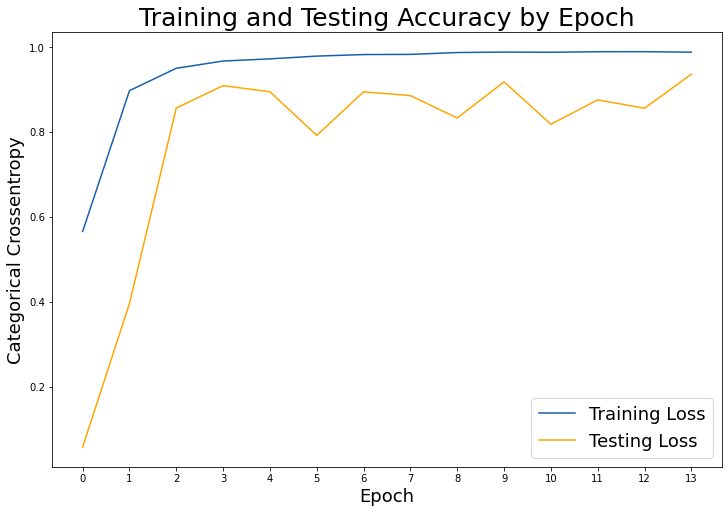

In [20]:
train_acc = history_d.history['accuracy']
test_acc = history_d.history['val_accuracy']
epoch_labels = history_d.epoch

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_acc, label='Training Loss', color='#185fad')
plt.plot(test_acc, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Accuracy by Epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks(epoch_labels, epoch_labels)    # ticks, labels

plt.legend(fontsize=18);

Our model is still overfit. Try some image augmentation to create more data

In [92]:
#https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/
augmentdata = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


augmentdata.fit(X_train)

In [109]:

#Instantiate model
cnn_aug = Sequential()

#Conv layer1
cnn_aug.add(Conv2D(filters = 75,
              kernel_size = (3,3),
              activation = 'relu',
              input_shape = (28,28,1)
              ))
cnn_aug.add(BatchNormalization())

#MaxPool layer1
cnn_aug.add(MaxPooling2D(pool_size = (2,2)))

#Conv layer2
cnn_aug.add(Conv2D(filters = 50,
              kernel_size = (3,3),
              activation = 'relu'
              ))
cnn_aug.add(Dropout(0.2))
cnn_aug.add(BatchNormalization())

cnn_aug.add(MaxPooling2D(pool_size = (2,2)))


#Conv layer3
cnn_aug.add(Conv2D(filters = 20,
              kernel_size = (3,3),
              activation = 'relu'
              ))
cnn_aug.add(Dropout(0.2))
cnn_aug.add(BatchNormalization())
#MaxPool3
cnn_aug.add(MaxPooling2D(pool_size = (2,2)))

#Flatten
cnn_aug.add(Flatten())

#Dense Layers
cnn_aug.add(Dense(128,activation = 'relu'))
cnn_aug.add(Dropout(0.2))
cnn_aug.add(Dense(32,activation = 'relu'))
cnn_aug.add(Dense(25, activation = 'softmax'))

In [110]:
cnn_aug.compile(loss = 'categorical_crossentropy',
           optimizer = 'adam',
           metrics = ['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', min_delta=0.00001,
                           patience=2, verbose=1, mode='auto')


In [111]:
history_aug = cnn_aug.fit(augmentdata.flow(X_train,y_train, batch_size = 128) , 
                          validation_data = (X_test,y_test),
                  epochs = 10,
                  verbose =1
#                   ,callbacks=[early_stop]
                         )

Epoch 1/10
215/215 [==============================] - 45s 207ms/step - loss: 2.6163 - accuracy: 0.2277 - val_loss: 2.9197 - val_accuracy: 0.1592
Epoch 2/10
215/215 [==============================] - 47s 219ms/step - loss: 0.9010 - accuracy: 0.6904 - val_loss: 1.3519 - val_accuracy: 0.6669
Epoch 3/10
215/215 [==============================] - 43s 199ms/step - loss: 0.5632 - accuracy: 0.8017 - val_loss: 0.8930 - val_accuracy: 0.7179
Epoch 4/10
215/215 [==============================] - 43s 200ms/step - loss: 0.4115 - accuracy: 0.8583 - val_loss: 0.2545 - val_accuracy: 0.9261
Epoch 5/10
215/215 [==============================] - 46s 212ms/step - loss: 0.3309 - accuracy: 0.8884 - val_loss: 0.9612 - val_accuracy: 0.6962
Epoch 6/10
215/215 [==============================] - 44s 203ms/step - loss: 0.2959 - accuracy: 0.9027 - val_loss: 0.2493 - val_accuracy: 0.9158
Epoch 7/10
215/215 [==============================] - 46s 214ms/step - loss: 0.2402 - accuracy: 0.9178 - val_loss: 0.3209 - val_ac

In [112]:
cnn_aug.evaluate(X_test, y_test)

225/225 [==============================] - 3s 15ms/step - loss: 0.0749 - accuracy: 0.9799


[0.07486871629953384, 0.9799219369888306]

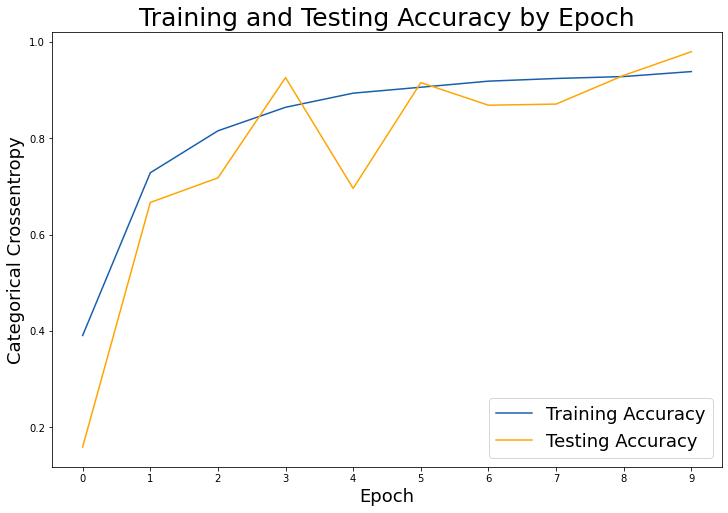

In [115]:
train_acc = history_aug.history['accuracy']
test_acc = history_aug.history['val_accuracy']
epoch_labels = history_aug.epoch

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_acc, label='Training Accuracy', color='#185fad')
plt.plot(test_acc, label='Testing Accuracy', color='orange')

# Set title
plt.title('Training and Testing Accuracy by Epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks(epoch_labels, epoch_labels)    # ticks, labels

plt.legend(fontsize=18);

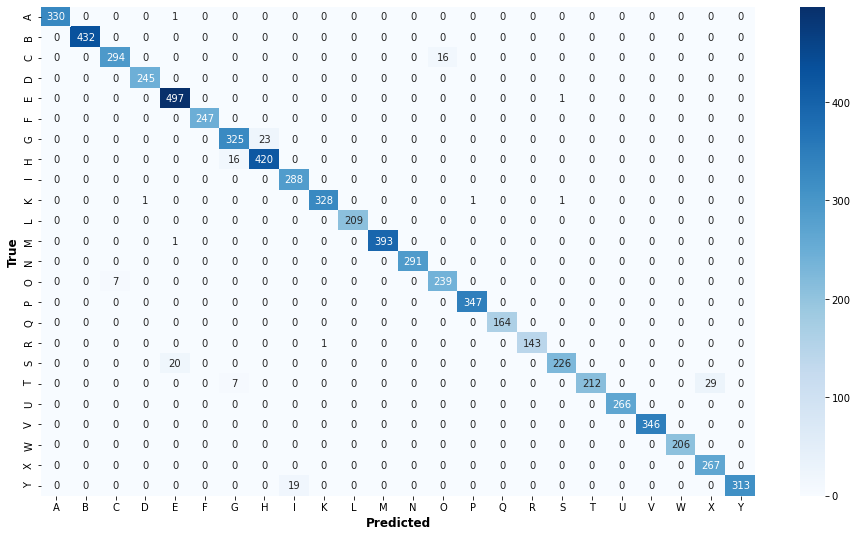

In [114]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = cnn_aug.predict(X_test)

plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test_labels , y_pred_labels)

sns.heatmap(cm, 
            annot=True, 
            fmt="d",
            cmap = 'Blues',
            xticklabels = label_dic.values(), 
            yticklabels = label_dic.values()
           )

plt.xlabel('Predicted',fontsize='large', fontweight='bold')
plt.ylabel('True',fontsize='large', fontweight='bold');
            

In [116]:
cnn_aug.save('./models')

INFO:tensorflow:Assets written to: ./models/assets
